In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]
#x is a list where first element is name of document and second is the text in documents.
#y is the category
x=[]
y=[]
path="/home/suraj/Music/Machine Learning Coding Ninjas/Project Text Classification/20_newsgroups"
i=0
for category in os.listdir(path):
    for current_file in os.listdir(path + '/' + category):
        with open (path + '/' + category + '/' + current_file,'r',encoding="utf8", errors='ignore') as file:
            x.append([current_file,file.read()])
            y.append(category)        
    
    print("{} Done !".format(category))                
print("Done")

talk.politics.guns Done !
talk.politics.mideast Done !
comp.sys.ibm.pc.hardware Done !
sci.crypt Done !
rec.sport.baseball Done !
soc.religion.christian Done !
talk.politics.misc Done !
alt.atheism Done !
sci.med Done !
sci.electronics Done !
sci.space Done !
rec.sport.hockey Done !
comp.sys.mac.hardware Done !
rec.autos Done !
rec.motorcycles Done !
talk.religion.misc Done !
misc.forsale Done !
comp.graphics Done !
comp.os.ms-windows.misc Done !
comp.windows.x Done !
Done


In [3]:
#DataType of x and y in detail
print(type(x))
print(type(x[0]))
print(type(x[0][0]))
print(type(x[0][1]))
print(type(y))
#We can see it is a tuple with first element as name of document and second text of document.
print(x[0])

<class 'list'>
<class 'list'>
<class 'str'>
<class 'str'>
<class 'list'>
['55252', 'Newsgroups: talk.politics.guns\nPath: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!pacific.mps.ohio-state.edu!zaphod.mps.ohio-state.edu!cs.utexas.edu!uunet!spsgate!mogate!newsgate!WACCVM.SPS.MOT.COM!ACUS05\nFrom: ACUS05@WACCVM.SPS.MOT.COM (Paul Anderson)\nSubject: Re: President Clinton\'s Email Address\nMessage-ID: <1993Apr26.193115.28709@newsgate.sps.mot.com>\nSender: usenet@newsgate.sps.mot.com\nNntp-Posting-Host: 192.55.25.1\nOrganization: Motorola Inc.\nDate: Mon, 26 Apr 1993 19:25:07 GMT\nLines: 15\n\njagst18+@pitt.edu (Josh A Grossman) writes:\n\n>Somebody was kind enough to post the Prez\'s compuserve email address.\n>I was smart enough to write it down somehwere on some small scap of paper\n>I can not find.  If you\'ve got it please email it to me.\n\nCompuServe - "75300.3115@CompuServe.com"\nAmerica On-Line - "Clintonpz@AOL.com\n\nBoth are accessible f

In [4]:
#splitting into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101)


In [5]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

14997
5000
14997
5000


In [6]:
#illustration of re.split
text="Hello How are You 80o897 909-"
import re
words=re.split("\s",text)
words

['Hello', 'How', 'are', 'You', '80o897', '909-']

In [7]:
#Creating a Dictionary Of Words
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped= re.split("\s",word)  #re.split function is used to split every word from the text...
    for s in stripped:
        #Iterating over each word
        if not(s.isalpha()) or s in stop_word or len(s) <=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'slow': 213,
 'popups': 10,
 'apr': 14753,
 'gmt': 13267,
 'department': 854,
 'computer': 2318,
 'university': 6156,
 'england': 124,
 'bryan': 34,
 'boreham': 1,
 'article': 9058,
 'application': 509,
 'creates': 75,
 'window': 814,
 'button': 128,
 'pops': 27,
 'dialog': 61,
 'strange': 174,
 'feature': 156,
 'program': 1445,
 'always': 1156,
 'box': 708,
 'much': 3401,
 'faster': 306,
 'first': 3058,
 'try': 1501,
 'pop': 94,
 'time': 3261,
 'shell': 146,
 'waiting': 201,
 'respond': 253,
 'positioning': 19,
 'not': 22056,
 'responding': 69,
 'thinks': 163,
 'already': 924,
 'right': 2550,
 'exactly': 629,
 'two': 3464,
 'components': 98,
 'get': 6134,
 'sulk': 3,
 'unclear': 32,
 'information': 1838,
 'greatly': 283,
 'thanks': 1216,
 'derek': 55,
 'also': 4534,
 'pointer': 49,
 'one': 9763,
 'due': 582,
 'popup': 23,
 'popped': 19,
 'setvalue': 3,
 'location': 126,
 'repeat': 132,
 'will': 11157,
 'unchanged': 4,
 'previous': 533,
 'response': 419,
 'can': 12004,
 'avoided': 37,

In [8]:
#Sorting the dictionary on basis of frequency of words in descending order
features=sorted(dic.items(), key=lambda x: x[1],reverse=True)
type(features)

list

In [9]:
#Dictionay
features

[('not', 22056),
 ('apr', 14753),
 ('gmt', 13267),
 ('can', 12004),
 ('will', 11157),
 ('one', 9763),
 ('article', 9058),
 ('like', 7015),
 ('just', 6956),
 ('people', 6445),
 ('university', 6156),
 ('get', 6134),
 ('know', 5790),
 ('think', 5362),
 ('may', 5255),
 ('new', 4634),
 ('use', 4578),
 ('also', 4534),
 ('even', 4022),
 ('good', 3947),
 ('many', 3687),
 ('make', 3661),
 ('two', 3464),
 ('see', 3429),
 ('much', 3401),
 ('time', 3261),
 ('first', 3058),
 ('say', 3037),
 ('want', 3026),
 ('anyone', 2999),
 ('need', 2886),
 ('way', 2867),
 ('used', 2822),
 ('world', 2711),
 ('really', 2610),
 ('now', 2565),
 ('right', 2550),
 ('since', 2528),
 ('still', 2487),
 ('believe', 2475),
 ('going', 2445),
 ('something', 2405),
 ('find', 2380),
 ('computer', 2318),
 ('said', 2307),
 ('take', 2301),
 ('system', 2297),
 ('might', 2280),
 ('please', 2278),
 ('using', 2189),
 ('news', 2165),
 ('last', 2165),
 ('never', 2130),
 ('must', 2114),
 ('back', 2106),
 ('god', 2104),
 ('state', 2081),

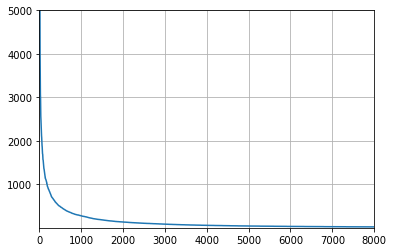

In [10]:
#plotting graph(words vs freq)
#further deciding number of features we want to take
import matplotlib.pyplot as plt
x_axis=[]
y_axis=[]
for i in range(len(features)):
    x_axis.append(i)
    y_axis.append(features[i][1])
plt.plot(x_axis,y_axis)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [11]:
#taking top 2000 words
featureslist=[features[i][0] for i in range(2000)]

In [12]:
featureslist

['not',
 'apr',
 'gmt',
 'can',
 'will',
 'one',
 'article',
 'like',
 'just',
 'people',
 'university',
 'get',
 'know',
 'think',
 'may',
 'new',
 'use',
 'also',
 'even',
 'good',
 'many',
 'make',
 'two',
 'see',
 'much',
 'time',
 'first',
 'say',
 'want',
 'anyone',
 'need',
 'way',
 'used',
 'world',
 'really',
 'now',
 'right',
 'since',
 'still',
 'believe',
 'going',
 'something',
 'find',
 'computer',
 'said',
 'take',
 'system',
 'might',
 'please',
 'using',
 'news',
 'last',
 'never',
 'must',
 'back',
 'god',
 'state',
 'work',
 'without',
 'got',
 'someone',
 'government',
 'well',
 'off',
 'problem',
 'made',
 'another',
 'better',
 'read',
 'usa',
 'information',
 'number',
 'sure',
 'come',
 'part',
 'give',
 'things',
 'every',
 'point',
 'help',
 'seems',
 'look',
 'little',
 'windows',
 'question',
 'years',
 'put',
 'long',
 'different',
 'data',
 'probably',
 'around',
 'tell',
 'file',
 'space',
 'set',
 'available',
 'try',
 'anything',
 'least',
 'program',
 

In [13]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of feature list
x_train_dataset=np.zeros([len(x_train),len(featureslist)],int)
print("Total No. Of Words :{}".format(len(x_train)))
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    words=re.split("\s",words)
    #Iterating over each word
    for word in words:
    #We will add the frequency corresponding to that word only which is in our feature list
        if word in featureslist:
            x_train_dataset[i][featureslist.index(word)]+=1
    if i%1000==0:
        print("{} Words Done ".format(i))
print("{} Done".format(len(x_train)))

Total No. Of Words :14997
0 Words Done 
1000 Words Done 
2000 Words Done 
3000 Words Done 
4000 Words Done 
5000 Words Done 
6000 Words Done 
7000 Words Done 
8000 Words Done 
9000 Words Done 
10000 Words Done 
11000 Words Done 
12000 Words Done 
13000 Words Done 
14000 Words Done 
14997 Done


In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(featureslist)],int)
print("Total No. Of Words : {}".format(len(x_test)))
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    words=re.split("\s",words)
    #Iterating over each word
    for word in words:
    #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if word in featureslist:
            x_test_dataset[i][featureslist.index(word)]+=1
    if i%1000==0:
        print("{} Words Done ".format(i))
print("{} Done".format(len(x_test)))

Total No. Of Words : 5000
0 Words Done 
1000 Words Done 
2000 Words Done 
3000 Words Done 
4000 Words Done 
5000 Done


In [15]:
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)


[[1 1 1 ... 0 0 0]
 [4 0 1 ... 0 0 0]
 [4 1 0 ... 0 0 0]
 ...
 [3 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
--------------------------
[[2 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 [2 1 1 ... 0 0 0]]


# Implementation Of Naive Bayes

In [16]:
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in featureslist:
            #Calculating total word in feature
            l=(x_train_with_i[:,featureslist.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
dictionary=fit(x_train_dataset,y_train)
y_pred=predict(x_test_dataset,dictionary)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
Own_Implemented_Naive_Bayes=score(y_test,y_pred)

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.75      0.68       253
           comp.graphics       0.55      0.57      0.56       223
 comp.os.ms-windows.misc       0.66      0.74      0.69       263
comp.sys.ibm.pc.hardware       0.78      0.61      0.69       267
   comp.sys.mac.hardware       0.62      0.75      0.68       221
          comp.windows.x       0.80      0.69      0.74       251
            misc.forsale       0.68      0.78      0.72       251
               rec.autos       0.73      0.76      0.74       254
         rec.motorcycles       0.72      0.83      0.78       260
      rec.sport.baseball       0.85      0.88      0.87       257
        rec.sport.hockey       0.94      0.90      0.92       247
               sci.crypt       0.89      0.82      0.85       229
         sci.electronics       0.69      0.70      0.70       239
                 sci.med       0.79      0.78      0.79       238
         

# Multinomial Naive Bayes(Already Implemented in SK Learn)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
predictions=clf.predict(x_test_dataset)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
Inbuilt_Multinomial_Naive_Bayes_score=score(y_test,predictions)

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.74      0.68       253
           comp.graphics       0.55      0.61      0.58       223
 comp.os.ms-windows.misc       0.67      0.77      0.72       263
comp.sys.ibm.pc.hardware       0.77      0.64      0.70       267
   comp.sys.mac.hardware       0.66      0.78      0.71       221
          comp.windows.x       0.78      0.68      0.73       251
            misc.forsale       0.70      0.75      0.72       251
               rec.autos       0.73      0.76      0.75       254
         rec.motorcycles       0.75      0.83      0.79       260
      rec.sport.baseball       0.84      0.91      0.87       257
        rec.sport.hockey       0.94      0.89      0.92       247
               sci.crypt       0.89      0.84      0.86       229
         sci.electronics       0.69      0.70      0.70       239
                 sci.med       0.81      0.79      0.80       238
         

# Comparision of Scores

In [19]:
print("Testing Scores")
print("SELF Implemented Naive Bayes Score : {}".format(Own_Implemented_Naive_Bayes))
print("Inbuilt Multinomial Naive Bayes Score : {}".format(Inbuilt_Multinomial_Naive_Bayes_score))

Testing Scores
SELF Implemented Naive Bayes Score : 0.7288
Inbuilt Multinomial Naive Bayes Score : 0.737


We have compared the scores and the score is very close to the inbuilt Multinomial Naive Bayes